## <font color = red> Please fill up the asked information!
    
<font color = teal>Name: Rownita Tasneem
<font color = teal>Mail: rownita.r.tasneem @utu.fi

------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about the data, so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM), which is <font color = green>modeling</font>.

The questions to be answered at this stage could include:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve its performance?
- How do we evaluate the model's performance?

<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does.
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- <b>A complete submission includes a working notebook</b>, so it's highly recommended to run "Restart & Run all" before the final save. Remember to submit BOTH versions of the exercise (ipynb AND html/pdf).
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
    - Passing requires that <b>the parts 1-5</b> are completed.
    - +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. Always give the credit where it belongs so please <b>cite your sources, whether you're referencing text or code</b>. You will learn so much more when you have to research and summarize information in your own words. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via email (tuhlei@utu.fi).
- Note! Don't leave it to the last moment! No feedback service during weekends.
- <b>We do not encourage the use of ChatGPT or similar models</b>, but if you choose to do so, always be critical of the outputs and try to comprehend them before any use. Also, make a brief description how you utilized the model (what was your input and how did you benefit from the output).


<font color = green> The guided exercise session is held on the 28th of November at 14:15-16:00, at TSE Elovena-Sali.</font>

<font color = red size = 4><b>The deadline is the 30th of November at 23:59</b></font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### Gather all packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [ ]:
import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font>

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is one of the classic supervised machine learning algorithms which assumes that similar points are close to each other.

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`.

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1500 rows from the dataframe using your student id as a seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: as mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable, gluc (about glucose levels), which is one-hot-encoded for you. It has similar values as cholesterol originally had [normal, at risk, elevated].*


In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive") ### connecting with Google, as I am doing this exercise on Google Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = '/content/drive/MyDrive/Datasets/Datasets_new/ex2_cardio_data.csv'

# Read the CSV file
cardio_data = pd.read_csv(data_path)

In [ ]:
### Code - Resample and print 15 rows

## setting student ID as a seed for reproducibility. seed works as a pseudorandom number generator
student_id = 2303926

# Taking a random sample of 1500 rows using the student ID as the seed
sample_cardio = cardio_data.sample(n = 1500, random_state = student_id)

# printing 15 rows
sample_cardio.head(15)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
4948,43,1,164,87.0,140,89,0,0,0,1,1,0,0,1,0,0
2765,54,2,160,58.0,120,80,0,0,1,0,1,0,0,1,0,0
3686,52,1,164,79.0,120,80,0,0,1,0,1,0,0,1,0,0
1653,59,1,161,73.0,160,90,1,0,1,0,0,1,0,1,0,0
3732,52,2,168,92.0,120,80,0,0,1,0,1,0,0,1,0,0
4810,53,1,170,125.0,150,90,0,0,1,1,1,0,0,1,0,0
4362,57,2,182,102.0,130,80,0,0,1,1,0,0,1,1,0,0
2964,47,1,159,88.0,120,80,0,0,1,0,1,0,0,1,0,0
808,57,1,160,78.0,110,70,0,0,1,0,1,0,0,1,0,0
1399,53,2,175,75.0,120,80,0,0,1,0,1,0,0,1,0,0


----

We have the data so now, let's put it to use.

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

**Exercise 1 B)**

Collect the features as an array named `features`, and the target variable as an array named `labels`. Create training and test data by randomly splitting the data into training (80%) and test (20%) sets.

- Do you need stratification for our dataset? Explain your decision.

### Checking the balance of the dataset:

Checking the distributions of the outcomes(0,1) of the target variable "cardio" is the way through which we can ensure the distributions of the outcomes of the target variable.



In the context of machine learning, stratification refers to the process of dividing a dataset into subsets in such a way that each subset has the same distribution of the target variable as the original dataset. Stratified sampling is commonly used when creating training and test sets, especially when dealing with imbalanced datasets.

Whether I need stratification depends on the distribution of the target variable (in this case, "cardio") in our dataset. If the dataset is balanced, meaning that the classes (presence and absence of cardiovascular disease) are roughly equally represented, then simple random sampling for splitting into training and test sets may be sufficient.

However, if the dataset is imbalanced, meaning that one class significantly outnumbers the other, it's generally a good idea to use stratified sampling.

This ensures that both the training and test sets maintain a similar class distribution as the original dataset.

This is important because a random split without stratification could result in one of the sets having a disproportionate representation of one class, leading to biased model training and evaluation.





In [ ]:

# normalize set to True, returns the relative frequency by dividing all values by the sum of values.
target_distribution = sample_cardio['cardio'].value_counts(normalize=True)
print(target_distribution)

0    0.703333
1    0.296667
Name: cardio, dtype: float64


The given dataset is not balanced as we have got different distributions  for each class of cardio variable. The distribution of absence of cardiovascular disease is 0.709, and the distribution of the presence of cardiovascular disease is 0.30.

Stratified sampling is crucial for splitting my dataset. In this way, it will be ensured that the class distribution in both the training and testing sets is representative of the original dataset. This is particularly important when dealing with imbalanced datasets, where one class may be significantly more prevalent than the other.

Stratification helps maintain a proportional representation of classes in both sets, preventing scenarios where the training or testing set may lack instances of a particular class.Therefore, we have to use stratification for splitting the dataset.


In [ ]:
### Code - Train-test split
features = sample_cardio.drop("cardio",axis = 1) # cardio is the target variable. So, separating the features from the datatset
labels = sample_cardio["cardio"] # taking the target variable as labels
# splitting the datasets into stratified train and test sets of features and  labels
X_train,x_test,Y_train,y_test = train_test_split(features, labels,test_size = 0.2, stratify = labels, random_state = student_id)

In [ ]:

print("Training Set Distribution:")
print(Y_train.value_counts(normalize=True)) #setting normalize = True , it will generate relative frequency

print("\nTest Set Distribution:")
print(y_test.value_counts(normalize=True)) # setting normalize = True , it will generate the relative frequency

Training Set Distribution:
0    0.703333
1    0.296667
Name: cardio, dtype: float64

Test Set Distribution:
0    0.703333
1    0.296667
Name: cardio, dtype: float64


<font color = lightcoral> \<Write your answer here\></font>


In both the training and testing datasets, a balanced distribution of the target variable, denoting the presence or absence of cardiac disease (cardio), has been achieved through the meticulous application of the stratified sampling method.

Remarkably, the prevalence of cardiac disease (cardio = 1) is meticulously maintained at 29.67% in both the training and testing sets.

Simultaneously, a proportionate distribution of 70.33% characterizes the instances denoting the absence of cardiac disease (cardio = 0) in both datasets.

This effective approach ensures a harmonious and representative stratification, thereby enhancing the reliability of subsequent analyses.

----------

**Exercise 1 C)**

Standardize the numerical features: Note that you should now have two separate features that you've divided all the features into.

- Describe how the k-NN model would make predictions about whether or not a patient has a CVD when the features are not standardized, and explain the reasons behind.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [ ]:
### Code - Standardization'
sc_X = StandardScaler() # creating a standard scaler object
X_train_standardized = sc_X.fit_transform(X_train) # fitting the scaler on the training data
x_test_standardized = sc_X.transform(x_test) # transforming the test data

<font color = lightcoral> \<Write your answer here\></font>

When working with machine learning models, especially distance-based algorithms like k-Nearest Neighbors (k-NN), standardizing numerical features is often crucial. Standardization, in this context, refers to the process of transforming the features so that they have a mean of 0 and a standard deviation of 1. This is typically done by subtracting the mean and dividing by the standard deviation for each feature.

# Importance of Standardization in k-NN:

# Scale Sensitivity:

k-NN relies on the notion of measuring distances between data points. If features are on different scales, those with larger magnitudes will have a disproportionate impact on the distance metric.
Standardizing features ensures that each feature contributes equally to the distance computation, preventing one feature from dominating the others solely based on its scale.

# Distance Metrics:

Common distance metrics used in k-NN, such as Euclidean distance, are sensitive to the scale of the features. If one feature has a large scale compared to others, it can outweigh the contribution of features with smaller scales.

Standardization helps maintain the relative importance of features when calculating distances.

In this dataset, the values of weight,height,age,ap_high,ap_low have higher values than other features. If these are not standardized,the distance metric of the KNN model will be influenced by these features.That is, the model will give more importance to these features.

# How k-NN Makes Predictions Without Standardization:

When features are not standardized, k-NN calculates distances based on the raw feature values. This means that features with larger scales will have a greater impact on the distance metric, potentially leading to biased results. The model may be influenced more by features with larger numerical values, irrespective of their actual importance in predicting the target variable.

In the context of predicting whether a patient has cardiovascular disease (CVD), features like height, weight, blood pressure, etc., have different scales. Without standardization, k-NN might give more weight to those features with larger scales (e.g., weight,height in in centimeters) .

-------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

In [ ]:
### Code - the kNN classifier

# creating a KNN classifier with k = 3
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score

# defining the model
# In this case, we are considering 3 nearest neighbors, and euclidean distance for calculating the distances of the neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = "euclidean")

# Train the KNN model with the standardized training features  and labels
knn_classifier.fit(X_train_standardized, Y_train) #Utilizing the standardized features for training



KNeighborsClassifier(metric='euclidean', n_neighbors=3)

### Evaluating the Trained KNN Model

In [ ]:


# Make predictions on the test set
y_pred = knn_classifier.predict(x_test_standardized)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)





Confusion Matrix:
 [[173  38]
 [ 53  36]]


### Plotting the Confusion Matrix of the KNN

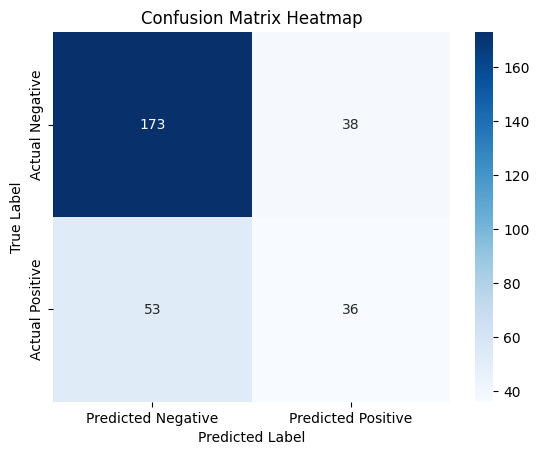

In [ ]:
# This code uses seaborn to create a heatmap of the confusion matrix.
# The annot=True argument adds the numerical values to the heatmap, and fmt='d' specifies that the values should be formatted as integers.
# The cmap='Blues' argument sets the color map to shades of blue.

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Predicted Negative", "Predicted Positive"], yticklabels = ["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label") # setting x-label
plt.ylabel("True Label") # setting y-label
plt.title("Confusion Matrix Heatmap") # setting title
plt.show() # showing the plot

### Accuracy:
Accuracy = (TP+TN)/(TP + TN + FP + FN)

Precision = TP/ (TP+FP)

Recall = TP / (TP + FN)


In [ ]:
# Extracting the true positive, false positive, false negative, and true positive values from the confusion matrix
TN,FP,FN,TP = conf_matrix[0][0],conf_matrix[0][1],conf_matrix[1][0],conf_matrix[1][1]

# Compute accuracy, precision, and recall
Accuracy = (TP+TN)/(TP + TN + FP + FN)

Precision = TP/ (TP+FP)

Recall = TP / (TP + FN)

# Print the computed metrics
print(f"Accuracy: {Accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")

Accuracy: 0.8427
Precision: 0.4865
Recall: 0.9730


<font color = lightcoral> \<Write your answer here\></font>

### **Explaining the Confusion Matrix in the Context of Our Dataset:**

In the context of the given heart disease dataset where the target variable (cardio) represents the presence or absence of the disease, each cell of the confusion matrix has a specific interpretation:

**True Negative (TN)**: The number of instances where the model correctly predicted the absence of heart disease is 173. In other words, these are cases where the true label is 0 (no disease) and the model correctly predicted 0.

**False Positive (FP)**: The number of instances where the model incorrectly predicted the presence of heart disease is 38. These are cases where the true label is 0 (no disease), but the model predicted 1 (presence of disease).

**False Negative (FN)**: The number of instances where the model incorrectly predicted the absence of heart disease is 53. These are cases where the true label is 1 (presence of disease), but the model predicted 0 (no disease).

**True Positive (TP)**: The number of instances is where the model correctly predicted the presence of heart disease is 36. In other words, these are cases where the true label is 1 (presence of disease), and the model correctly predicted 1.


# **Explaining the Performance of the Trained KNN Model with Different Classes**:
The performance of the trained KNN model with different classes are given below.

Accuracy = 0.8427

Precision = 0.4865

Recall = 0.9730


The accuracy of the model is 84.27% which is considerably  high. That means, the model correctly predicts 84.27% of the time for the cases of the majority classes, which the absence of the heart disease.

A precision of 0.4865 means that when the model predicts a positive (presence of the heart disease), it is correct about 48.65% of the time.

A recall of 0.9730 signifies that the model captures 97.30% of instances where the actual condition is positive.

The relatively high accuracy indicates that the model performs well in terms of overall correctness.On the other hand, the lower precision suggests that there is room for improvement in minimizing false positives. This is important when the cost or impact of incorrectly predicting the positive class is significant.

The high recall implies a strong ability to identify instances of the positive class, minimizing false negatives. This is valuable, especially in scenarios where failing to identify positive cases has severe consequences.




# **Reasons for being Caustious While Interpreting Accuracy**:

The given heart disease dataset is not balanced. This means, the distribution of each category of the target variable is not the same. In this case, the distributions of the presence and absence of the heart disease are not same.

Notably, the model demonstrates a commendable accuracy of approximately 84.27%. However, it is imperative to acknowledge that, within this imbalanced context, the model displays a predilection for effectively classifying the majority class—instances without heart disease. This inclination results in a potential diminution in performance regarding the minority class, characterized by instances with heart disease. Evidently, the model accurately predicts the absence of heart disease for 173 instances, yielding a true negative value of 173.

Crucially, the high accuracy figure should be approached with caution in light of the imbalanced dataset. The model's efficacy in identifying instances of the minority class, representing the presence of heart disease, is notably constrained. Notably, the model achieves a true positive count of 36, effectively predicting the presence of cardiac disease.

In this nuanced scenario, it is essential to recognize that the high accuracy metric does not inherently ensure the model's adeptness in correctly discerning instances of the minority class. Rather, the accuracy measure may inadvertently overshadow the misclassification of the minority class due to the prominence of accurate predictions in the majority class.

Hence, a circumspect approach to accuracy interpretation is warranted, particularly when dealing with imbalanced datasets. Additional evaluation metrics, such as precision, recall, and F1 score, should be considered to provide a more comprehensive understanding of the model's performance across diverse class categories.

---------------

You randomly divided the data into two sets, one for training the k-NN model and the other for evaluating its performance. However, randomness is not the thing we really need, and in fact, it's not something we even desire. Instead, what we do want is to keep track of each step we're making and exporing. This said, the *reproducibility* of the results is extremely important in research. To achieve this, we can utilize <font color = lightcoral> a random seed</font>, with which we can re-run the codes and get the exact same results than before.

## The actual task is to initialize a single seed and use it to generate that list of 1000 random numbers.


For example, we can use a fixed seed when we're shuffling the data before splitting it into training and test sets. This ensures that when we're re-runing the code, we obtain exactly the same partitions of the data in each split.

**Exercise 1 E)**

Initialize 1000 random seeds and continue with the k-NN model ($k=3$): Perform 1000 different train-test splits using these seeds and store the accuracies from each split. Plot the accuracies in a histogram, and discuss your results.

*Tip: You can add the accuracy from the previous exercise in the plot by drawing a vertical line with the function `matplotlib.axes.Axes.axvline(<accuracy>)` if you want!*

In [ ]:
### Code - Initialization of the 1000 fixed seeds
num_seeds = 1000
previous_accuracy = 0.8427

In [ ]:
### Code - 1000 different train-test-splits

# Initialize an array to store accuracies
accuracies = np.zeros(num_seeds)

# Train and evaluate the k-NN model for each random seed
for i in range(num_seeds):
    # Initialize a random seed
    random_seed = np.random.randint(1, 10000)

    # Split the data using the random seed
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_standardized, Y_train, test_size=0.2, random_state=random_seed)

    # Create k-NN model with k=3
    knn_model = KNeighborsClassifier(n_neighbors=3,p = 2 , metric = "euclidean")

    # Train the model
    knn_model.fit(X_train_split, y_train_split)

    # Make predictions on the test set
    y_pred_split = knn_model.predict(X_test_split)

    # Compute accuracy and store in the array
    accuracies[i] = accuracy_score(y_test_split, y_pred_split)

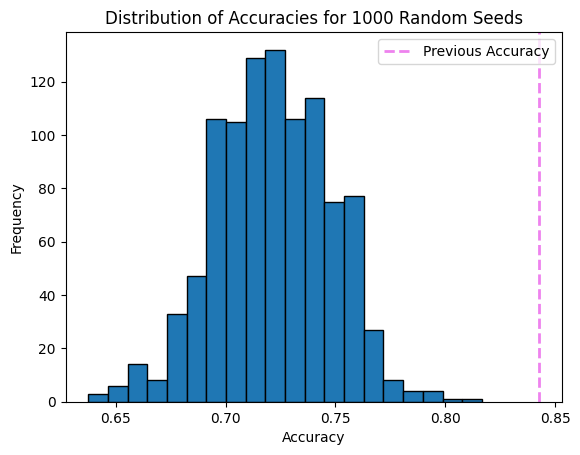

In [ ]:
# Plot the histogram of accuracies
plt.hist(accuracies, bins=20, edgecolor='black')
plt.axvline( x = previous_accuracy, color='violet', linestyle='dashed', linewidth=2, label='Previous Accuracy')
plt.title('Distribution of Accuracies for 1000 Random Seeds')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font color = lightcoral> \<Write your answer here\></font>
From the above plot, it is evident that the accuracies are lower than before.


------

One really common evaluation metric is <font color = lightcoral>the area under the receiver operating characteristic (AUROC, AUC or AUC-ROC)</font>.  It provides a measure of a model's ability to distinguish between classes, especially in binary classification tasks between the <i>positive class</i> and the <i>negative class</i>. (There sure are multiclass and multilabel cases too, but they are out of scope here.)

In our case, individuals who have a CVD form the positive class. As the name of the measure suggests, it combines two keys aspects to interpret a model's performance: ROC curves are about the trade-off between the true positive rate and the false positive rate, the former representing the model's ability to correctly identify individuals with a CVD (true positives) and the latter measuring the model's tendency to incorrectly classify individuals without a CVD as if they have the disease (false positives). Thus, the area beneath the curve is simply the AUROC, a single numerical value, that summarizes the overall performance.

**Exercise 1 F)**

Evaluate the performance of the trained k-NN model by computing the AUROC and plotting the related curve. Draw also the line for random guesses.

- How well does the k-NN model perform in distinguishing between healthy individuals and those with a CVD?

*Tip: You should not use the predicted labels in this exercise.*

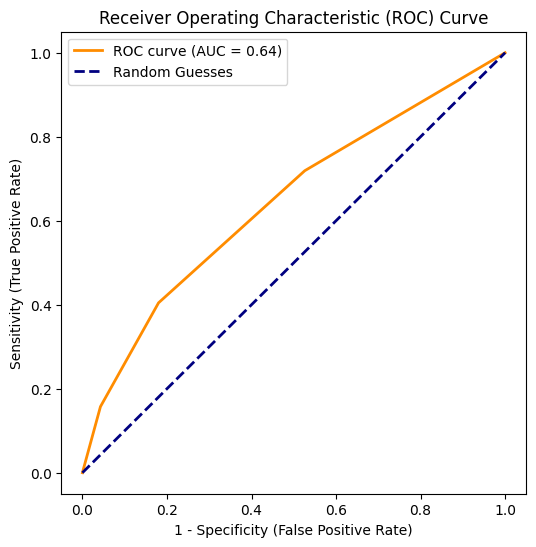

In [ ]:
### Code - ROC curve and AUROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# Assuming you have standardized features X_train_standardized and X_test_standardized, and labels y_train and y_test

# Create k-NN model with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn_model.fit(X_train_standardized, Y_train)

# Get predicted probabilities for each class on the test set
y_score = knn_model.predict_proba(x_test_standardized)

# Binarize the labels for a binary classification task
y_test_binary = label_binarize(y_test, classes=[0, 1])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_binary.ravel(), y_score[:, 1].ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guesses')
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper left')
plt.show()


<font color = lightcoral> \<Write your answer here\></font>

In the above plot, the value of  AUROC is 0.64.

Here's an interpretation based on the AUROC value:

0.5 to 0.6: Poor discrimination

0.6 to 0.7: Fair discrimination

0.7 to 0.8: Good discrimination

0.8 to 0.9: Very good discrimination

0.9 to 1.0: Excellent discrimination

Based on the given interpretations, our trained KNN model falls into the " fair discrimination" range. Hence, the trained KNN model fairly discriminates between healthy individuals and those with cardiovascular disease. But this model could be more improved.

The random guess line represents the performance of a random classifier. In the above plot, our ROC curve is above the Random Guess Line. It indicates that the model is performing better than random.



__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire dataset on this task.

- What can you say about the accuracy compared to the previous task?
- What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This sure can be done manually, but `cross_val_score` is quite a handy function too.*

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


# using the entire dataset
X= cardio_data.drop("cardio",axis = 1) # extracting features
y= cardio_data["cardio"] # extracting the label

# Creating a standard scaler instance
scaler = StandardScaler()

# Fitting and transforming the features
X_scaled = scaler.fit_transform(X)

# Creating k-NN model with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# StratifiedKFold is used to ensure that each fold has the same distribution of target classes as the entire dataset
# creating a StratifiedKFold instance with shuffle= True. StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

stratified_kf = StratifiedKFold(shuffle = True, random_state = 42) # using default number of splits

# Performing leave-one-out cross validation with standard scaling
accuracy_scores = cross_val_score(knn_model, X_scaled, y, cv = stratified_kf, scoring = "accuracy")

# Calculate mean accuracy
mean_accuracy = accuracy_scores.mean()
print("Mean Accuracy:",mean_accuracy)


Mean Accuracy: 0.6743333333333335


<font color = royalblue> \<Write your answer here\></font>
The mean accuracy obtained after performing leave-one-out cross-validation with the k-NN model (k=3) is 0.67. Comparing this accuracy to the previous task where I achieved an accuracy of 0.84, it's evident that the performance has notably decreased. This indicates that the model might be overfitting or struggling to generalize well to new data points.

Considering this discrepancy, I would hesitate to conclude that the k-NN model works optimally for the given problem.The decrease in accuracy suggests that the model may not be robust enough, and there might be factors like noise or outliers affecting its performance.

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k.

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire dataset.

- Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [ ]:
# Create a range of k values from 1 to 30
k_values = range(1,31)

#ceating a list for storing accuracy scores
list_accuracy_scores = []

# Perform leave-one-out-cross validation for each k

for k in k_values:

# Creating k-NN model with k
  knn_model = KNeighborsClassifier(n_neighbors=k)

# StratifiedKFold is used to ensure that each fold has the same distribution of target classes as the entire dataset
# creating a StratifiedKFold instance with shuffle= True. StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

  stratified_kf = StratifiedKFold(shuffle = True, random_state = 42) # using default number of splits

# Performing leave-one-out cross validation with standard scaling
  accuracy_scores_2 = np.mean(cross_val_score(knn_model, X_scaled, y, cv = stratified_kf, scoring = "accuracy"))
  list_accuracy_scores.append(accuracy_scores_2)




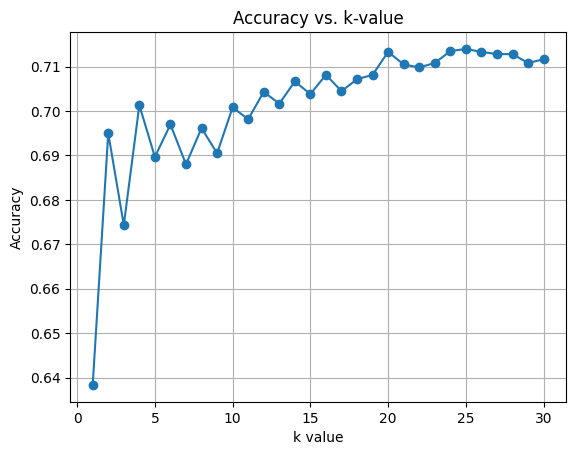

In [ ]:
### Code - Plot the accuracies vs. the values for
# Plot accuracies versus k values
plt.plot(k_values, list_accuracy_scores, marker = "o")
plt.title("Accuracy vs. k-value")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
# Find the optimal k value
optimal_k = k_values[np.argmax(list_accuracy_scores)]
print(f"The optimal k value is {optimal_k} with an accuracy of {max(list_accuracy_scores)}")

The optimal k value is 25 with an accuracy of 0.7140000000000001


<font color = green>\<Write your answer here\></font>

**Comparison to k=3:**

In the previous KNN model(k=3) with cross validation, the mean accuracy was 0.674. On the other hand, the  accuracy score is 0.714 when k = 25.

**Impact of Increasing k:**

When k = 25, the max accuracy score is 0.714, and the accuracy scores decrease sharply after when k increases beyond 25.In this case, there is a trade-off between bias and variance.

In addition,  accuracy scores fluctuate after k = 20, and reaches maximum value when k becomes 25.

These fluctuations occur due to over-smoothing and loss of model flexibility.


**Impact of Small or Large k:**

Choosing a very small k (e.g., 1) can make the model sensitive to noise and outliers, leading to overfitting. On the other hand, choosing a very large k may oversmooth decision boundaries, causing underfitting and poor generalization. The optimal k strikes a balance between capturing local patterns and generalizing well to new data.

________________
## <font color = red>  4. Training and testing on the same dataset </font>

<i>Note that this should never be done outside of this exercise! You have been warned.</i>

Oh, but what if we just trained a model using the *entire* dataset? Wouldn't we like to use as much data as possible to discover the underlying patterns in the data so why not to use all of it?

**Exercise 4**

This is quite straightforward: Train 30 k-NN models ($k = 1...30$ ) using the whole dataset and evaluate the trained models using, again, the whole dataset. Create a plot that displays the accuracies against the corresponding k values. Include the accuracy values from the previous task in the same figure.

- What's the optimal value for k now and why's that? How would you interpret the reliability of the predictions?
- Explain why you should never use the same dataset for training and testing.

In [ ]:
### Code - Train with whole data

k_values = range(1,31)

# Separating features and labels

X_features = cardio_data.drop("cardio",axis = 1)
y_labels = cardio_data["cardio"]

#Create a StandardScaler instance
scale = StandardScaler()
X_features_standardized = scale.fit_transform(X_features)

# Initializing arrays to store accuracy values
accuracies_train = []

for k in k_values:
  knn_model = KNeighborsClassifier(n_neighbors = k) # defining KNN classifier
  knn_model.fit(X_features_standardized,y_labels)# fitting the classifier on the dataset
  y_pred_train = knn_model.predict(X_features_standardized) # Making predictions by KNN
  accuracy_train = accuracy_score(y_labels, y_pred_train) # calculating the accuracy scores
  accuracies_train.append(accuracy_train)




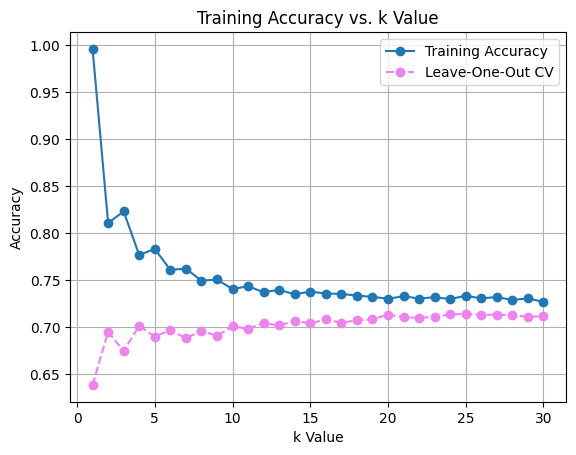

In [ ]:
### Code - Plot results
plt.plot(k_values, accuracies_train, label = "Training Accuracy", marker = "o")

#plotting previous accuracy scores
plt.plot(k_values,list_accuracy_scores, label='Leave-One-Out CV', marker = "o", linestyle='dashed', color = "violet")
plt.title('Training Accuracy vs. k Value') # setting x-label
plt.xlabel('k Value') #setting x-label
plt.ylabel('Accuracy') # setting y-label
plt.grid(True)
plt.legend()
plt.show()







In [ ]:
# Find the optimal k value
optimal_k_whole_dataset = k_values[np.argmax(accuracies_train)]
print(f"The optimal k value is {optimal_k_whole_dataset} with an accuracy of {max(accuracies_train)}")

The optimal k value is 1 with an accuracy of 0.9963333333333333


<font color = red>\<Write your answer here\></font>

The optimal value of K is 1 and the accuracy is 0.996. This model may not generate accurate prediction for unseen and new data.

The model is making predictions based on the single nearest neighbor to each data point. In other words, for each instance in this dataset, the model is assigning the label of the closest point in the entire dataset. This  results in a high accuracy on the training set because the model is essentially memorizing the training data.

## Comparison to Previous Accuracies:

When we give the whole dataset for training, the accuracy fluctuates as k increases.The highest accuracy is achieved when k = 1.
In the previous case, the accuracy was 0.714
When we trained KNN by cross-validation method, it achieved highest accuracy as k values were relatively larger (k = 20, k = 25).

## Reliability of Predictions:

Evaluating on the same dataset can lead to overfitting, where the model memorizes the training data instead of learning general patterns. Thus, the reliability of predictions based on this approach may be overstated.High training accuracy does not guarantee good generalization. So, the reliability of predictions should be assessed using an independent test set or through cross-validation.Overfitting to the training data occur as the model is too complex (small k).

## Reasons for not to Use the Same Dataset for Training and Testing:

Using the same dataset for training and testing may result in a model
that performs well on the training data but fails to generalize to new, unseen data. The model may learn the specificities of the training instances, including noise and outliers, leading to poor performance in real-world scenarios. The purpose of testing is to assess how well the model can make predictions on data it has never seen during training, providing a more reliable measure of its true performance.

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and k-NN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression - as we are changing our main goal from predicting discrete classes (healty/sick) to estimating continuous values. The following exercises are going to involve utilizing two different regression models, <font color = darkorange>Ridge Regression</font> and <font color = darkorange>K-Nearest Neighbors (k-NN) Regression</font>, and our goal is to evaluate and compare the performances of these two models.

Let's change the dataset to make the following exercises more intuitive. The new dataset is about brushtail possums and it includes variables such as

- <b>sex</b>: Gender, either male (0) or female (1)
- <b>age</b>: Age in years
- <b>len_head</b>: Head length in cm
- <b>width_skull</b>: Skull width in mm
- <b>len_total</b>: Total length in cm
- <b>len_tail</b>: Tail length in cm
- <b>len_foot</b>: Foot length
- <b>len_earconch</b>: Ear conch length
- <b>width_eye</b>: Distance from medial canthus to lateral canthus of right eye, i.e., eye width
- <b>chest</b>: Chest grit in cm
- <b>belly</b>: Belly grit in cm

In this case, our target variable will be *the age of the possum*. The data for this exercise has been modified from the original source.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [ ]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = '/content/drive/MyDrive/Datasets/Datasets_new/ex2_possum_data.csv'

# Load the data
possum_data = pd.read_csv(data_path)

-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. For example, we could examine how a change in possum's total length affects, on average, its estimated age.

We start by examing those relationships between the variables in the given dataset.


**Exercise 5 A)**

Plot pairwise relationships between the age variable and the others where you color the samples based on the sex variable.

- Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?
- Are there any differences in the correlations between males and females?

*Tip: `seaborn.pairplot()` is handy with the parameters `(x,y)_vars` and `hue`. You actually can fit a linear model to draw a regression line with the parameter `kind` set to `"reg"`.*

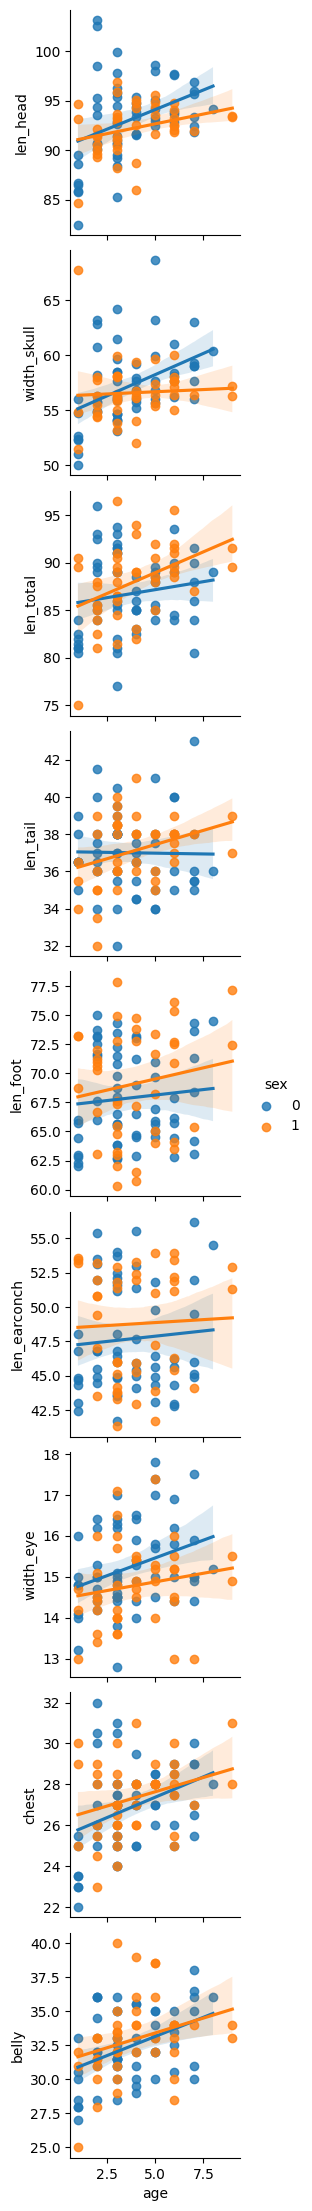

In [ ]:
# Plot pairwise relationships with regression lines and color by sex
sns.pairplot(possum_data, x_vars = ["age"] , y_vars=['len_head', 'width_skull', 'len_total', 'len_tail', 'len_foot', 'len_earconch', 'width_eye', 'chest', 'belly'], hue='sex', kind='reg')

# Show the plot
plt.show()

<font color = darkorange>\<Write your answer here\>

Investigating the relationship between age and morphological features in male and female possums, we observed notable positive correlations. Specifically, the length of the head (length_head) demonstrated a positive correlation with age in both male and female possums. Furthermore, attributes such as belly circumference (belly) and total body length (len_total) exhibited strong positive correlations with age across both genders.

In the case of female possums, an additional positive correlation was identified between the length of the tail (len_tail) and age. However, intriguingly, no significant correlation was observed between the width of the skull (width_skull) and age in females. Similarly, the length of the earconch displayed no discernible correlation with age in female possums.

Conversely, in male possums, our analysis revealed an absence of correlation between the length of the earconch and age. Additionally, the length of the tail (len_tail) in male possums exhibited an approximate lack of correlation with age.

These findings contribute to our understanding of the nuanced relationships between age and specific morphological characteristics in possum populations, providing valuable insights for further investigations.

In examining the correlations between age and various morphological features in male and female possums, discernible distinctions emerged. Notably, positive correlations were identified between age and the length of the head (length_head) for both genders, as well as with belly circumference (belly) and total body length (len_total) in both male and female possums.
However, gender-specific variations were observed.

In female possums, an additional positive correlation was found between the length of the tail (len_tail) and age, while the width of the skull (width_skull) and the length of the earconch displayed no significant correlations with age. Conversely, in male possums, there were no evident correlations between the length of the earconch and age, and the length of the tail (len_tail) also exhibited an approximate lack of correlation with age.There are similar correlations between age and len_earconch in male and female possums.

------

Before the regression analysis itself, let's check that our dataset is in a proper format. We'll also perform the train-test split as we're going to first tune the hyperparameters for each model using the training set and test the overall performance of the chosen models using the test set.

**Exercise 5 B)**

Do you need to prepare the data a little? Explain your decision. Perform the train-test (80/20) split.

In [ ]:
possum_data.isnull().sum() #checking missing values

sex             0
age             0
len_head        0
width_skull     0
len_earconch    0
width_eye       0
len_foot        0
len_tail        0
chest           0
belly           0
len_total       0
dtype: int64

In [ ]:
### Code - Data preparation

# separating features (X) and target variable(Y) (Age is the target variable)
X_features_3 = possum_data.drop("age",axis = 1) # discarding the target variable and taking other variables
y = possum_data["age"] # target variable


# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_features_3, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)







X_train shape: (80, 10)
X_test shape: (21, 10)
y_train shape: (80,)
y_test shape: (21,)


<font color = darkorange>\<Write your answer here\></font>
In the above dataset, there is no missing value. The only categorical variable is "sex" which has only two categories. In this scenario, it is not required to use one-hot-encoding which is particularly useful when dealing with categorical variables that have more than two categories or when I want to avoid misleading relationships.

In my scenario, where 'sex' has two categories (0 and 1), using the original encoding is sufficed.

Therefore, I do not need to apply any data cleaning method.


------

Regarding the k-NN, we have already get familiar with the optimization of the k value. The idea behind the k-NN is the same as previously in classification, the output isn't a class anymore but a continuous value. So, for now, we can stick to the optimal k value. However, for Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (read as 'lambda'), the regularization term (or penalty term or L2 penalty, how ever we'd like to call it), and try to find its optimal value for this task. After the model selection for both regression is performed, we compare the chosen models using a metric called <font color = darkorange>mean absolute error (MAE)</font>.

**Exercise 5 C)**

Train multiple ridge regression models and k-NN regression models. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation. Remember to use only the training dataset for model selection. Plot the optimal k values and lambdas versus corresponding MAEs (two different plots).

- Introduce the optimal hyperparameters for each regression model.
- How do you interpret the MAE in our case when the target variable is age?

*Note: In a `sklearn.linear_model.Ridge` class, lambda is called as "alpha" so don't get confused.*

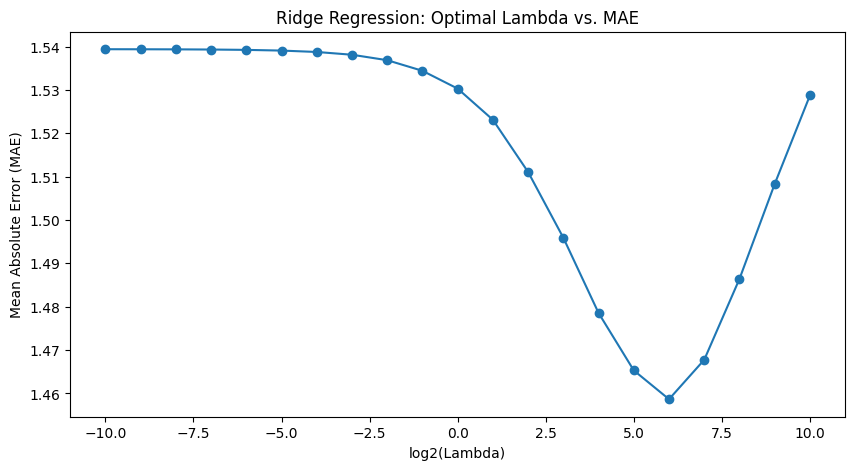

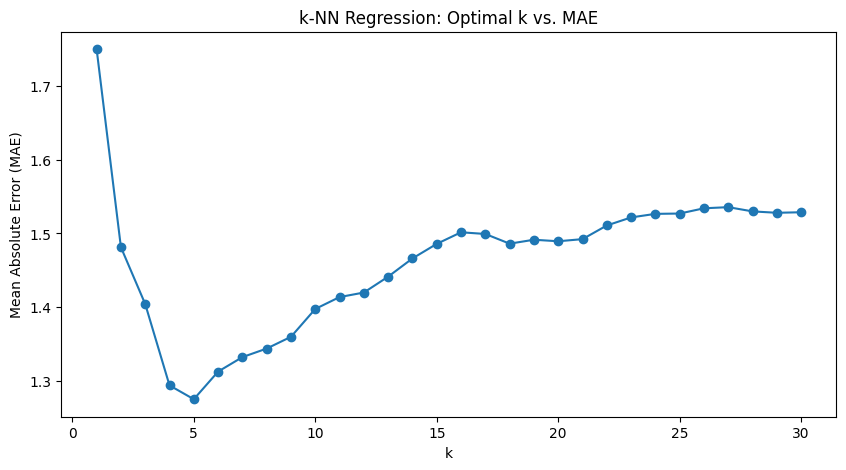

Optimal Lambda for Ridge Regression: 64
Optimal k for k-NN Regression: 5


In [ ]:
### Code - CV for Ridge regression and k-NN regression

# Standardize features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Ridge Regression
lambda_values = [2**i for i in range(-10, 11)]
ridge_mae_values = []

for alpha in lambda_values:
    ridge_model = Ridge(alpha=alpha)
    loo = LeaveOneOut()
    mae = -cross_val_score(ridge_model, X_train_standardized, y_train, scoring='neg_mean_absolute_error', cv=loo).mean()
    ridge_mae_values.append(mae)

# k-NN Regression
k_values = list(range(1, 31))
knn_mae_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    loo = LeaveOneOut()
    mae = -cross_val_score(knn_model, X_train_standardized, y_train, scoring='neg_mean_absolute_error', cv=loo).mean()
    knn_mae_values.append(mae)

# Find optimal values
optimal_lambda = lambda_values[np.argmin(ridge_mae_values)] # optimal lambda value will generate minimum MAE
optimal_k = k_values[np.argmin(knn_mae_values)] # optimal k-value will generate minimum MAE

# Plotting Ridge Regression results
plt.figure(figsize=(10, 5))
plt.plot(np.log2(lambda_values), ridge_mae_values, marker='o')
plt.title('Ridge Regression: Optimal Lambda vs. MAE')
plt.xlabel('log2(Lambda)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

# Plotting k-NN Regression results
plt.figure(figsize=(10, 5))
plt.plot(k_values, knn_mae_values, marker='o')
plt.title('k-NN Regression: Optimal k vs. MAE')
plt.xlabel('k')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

# Print optimal hyperparameters
print(f"Optimal Lambda for Ridge Regression: {optimal_lambda}")
print(f"Optimal k for k-NN Regression: {optimal_k}")

<font color = darkorange>\<Write your answer here\></font>

The optimal lambda for Ridge Regression is 64 and the optimal K for k-NN regression is 5.

Mean Absolute Error (MAE) represents the average absolute difference between the predicted age values and the actual age values. In the context of age prediction, a lower MAE indicates that, on average, the model's predictions are closer to the true age values.

 if the MAE is 1.45, it means, on average, the model's predictions deviate by 1.45 years from the true age. The smaller the MAE, the better the model's performance in accurately predicting age.

------

The cross-validation was employed for model selection and at this point, we have the optimal hyperparameter settings for each model. Let's finally assess both models using the test set. To continue from this, we first fit the chosen models using the entire training, ensuring that the models are trained with the maximum available data.

**Exercise 5 D)**

Fit the chosen models with the whole training set. Evaluate the models using the test set and describe the results.

- How well did the models perform in estimating the possums' ages?
- So, what's the pitfall in here if you had compared the overall performance of the models based on the cross-validation MAEs and not the MAEs for the test set?

In [ ]:
## Code - Evaluating the selected models
from sklearn.metrics import mean_absolute_error


# Fit Ridge Regression with optimal lambda
ridge_model = Ridge(alpha=optimal_lambda)
ridge_model.fit(X_train_standardized, y_train)

# Fit k-NN Regression with optimal k
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
knn_model.fit(X_train_standardized, y_train)

# Predictions on the test set
ridge_predictions = ridge_model.predict(X_test_standardized)
knn_predictions = knn_model.predict(X_test_standardized)

# Evaluate models on the test set
ridge_mae_test = mean_absolute_error(y_test, ridge_predictions)
knn_mae_test = mean_absolute_error(y_test, knn_predictions)

# Display results
print(f"Ridge Regression MAE on Test Set: {ridge_mae_test}")
print(f"k-NN Regression MAE on Test Set: {knn_mae_test}")

Ridge Regression MAE on Test Set: 1.5092863806764771
k-NN Regression MAE on Test Set: 1.5047619047619047


<font color = darkorange>\<Write your answer here\></font>

On average, the predictions from the Ridge Regression model deviate by approximately 1.509 years from the true ages in the test set. Similarly,on average, the predictions from the k-NN Regression model deviate by approximately 1.505 years from the true ages in the test set.

These MAE values represent the absolute average differences between the predicted and actual age values. Lower MAE values indicate better performance, and in this case, the models are providing relatively accurate age estimates.

**Pitfall in Comparing Models Based on Cross-Validation MAEs:**

The potential pitfall in comparing models based solely on cross-validation MAEs is that cross-validation assesses the model's performance on the same dataset used for training. While cross-validation helps to mitigate issues like overfitting, the model might still become overfit to the specific characteristics of the training data.

Evaluating models on a separate test set provides a more reliable indication of their generalization performance to new data. If the test set performance is significantly worse than the cross-validation performance, it could indicate overfitting during the model selection phase.Therefore, using a test set provides a more realistic assessment of how well the models are likely to perform on new, unseen data, and it helps identify potential overfitting issues that might not be apparent in cross-validation results.

________________
## <font color = slategrey> BONUS: Feature selection - most useful features in predicting cardiovascular diseases </font>

You can stop here and get the "pass" grade! To get the "pass with honors" grade, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise is not as straightforward as the previous ones, and may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain what you did and WHY you did it.

----------------


Unfortunately, due to the lack of resources and time, doctors can't measure all the values represented in the given cardio dataset. Fortunately, eager students are willing to help: Your task is to identify <font color = slategrey>four [4] most useful features</font> for predicting the presence of the CVD from the dataset. The steps needed for this job are presented above except the feature selection part. You must remember not to leak any information from the test set when selecting the features, i.e., you try to find those five features using only the training set.

Regarding the feature selection itself, you may choose your weapon from the three categories: filter methods, embedded methods or wrapper methods. Use <font color = slategrey>two methods from two different category and compare their outputs</font>. Bonus material about the methods is provided in Moodle.

Evaluate the model of your choice with the limited dataset by examining the confusion matrix and computing the accuracy and the AUROC.

**Discuss** your findings and results.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Confusion Matrix:
[[796  47]
 [287  70]]
Accuracy: 0.7217
AUROC: 0.7013


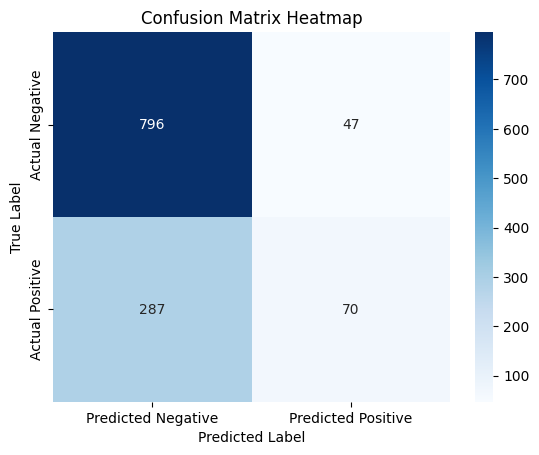

In [ ]:
## Code - Bonus task
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into features (X) and target variable (y)
X = cardio_data.drop(columns=['cardio'])
y = cardio_data['cardio']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

## Filter Method: Correlation-based Feature Selection
correlation_matrix = cardio_data.corr()
correlation_with_target = correlation_matrix['cardio'].abs().sort_values(ascending=False)
selected_features_filter = correlation_with_target[1:5].index.tolist()

## Embedded Method: Recursive Feature Elimination (RFE) with Logistic Regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X_train, y_train)
selected_features_rfe = X.columns[fit.support_]

# Model Evaluation

## Logistic Regression with Selected Features
logreg = LogisticRegression()
logreg.fit(X_train[selected_features_filter], y_train)
y_pred = logreg.predict(X_test[selected_features_filter])

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# AUROC
y_prob = logreg.predict_proba(X_test[selected_features_filter])[:, 1]
auroc = roc_auc_score(y_test, y_prob)
print(f"AUROC: {auroc:.4f}")

# This code uses seaborn to create a heatmap of the confusion matrix.
# The annot=True argument adds the numerical values to the heatmap, and fmt='d' specifies that the values should be formatted as integers.
# The cmap='Blues' argument sets the color map to shades of blue.

sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Predicted Negative", "Predicted Positive"], yticklabels = ["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label") # setting x-label
plt.ylabel("True Label") # setting y-label
plt.title("Confusion Matrix Heatmap") # setting title
plt.show() # showing the plot


<font color = slategrey>\<Write your answer here\></font>

**Feature Selection Methods:**

**Filter Method: Correlation-based Feature Selection**

In this implementation , I have calculated the correlation coefficients between each feature and the target variable ('cardio').

After that, I have selected the top 4 features with the highest absolute correlation coefficients.

**Embedded Method: Recursive Feature Elimination (RFE) with Logistic Regression**

I have also used Logistic Regression with RFE to recursively eliminate less important features. After that, I have trained the model on the training set and rank features based on their importance. Finally, I have selected the top 4 features.

**Model Evaluation:**

I have trained a Logistic Regression classifier using the selected features on the training set. After that, I have evaluated the model on the test set using a confusion matrix, accuracy, and AUROC.

After running the above model, we got 796 true negative values and  70 true positive values.

In [ ]:
# Extracting the true positive, false positive, false negative, and true positive values from the confusion matrix
TN,FP,FN,TP = conf_matrix[0][0],conf_matrix[0][1],[1][0],conf_matrix[1][1]

# Compute accuracy, precision, and recall
Accuracy = (TP+TN)/(TP + TN + FP + FN)

Precision = TP/ (TP+FP)

Recall = TP / (TP + FN)

# Print the computed metrics
print(f"Accuracy: {Accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")

Accuracy: 0.9475
Precision: 0.5983
Recall: 0.9859


The accuracy is 0.9475. Precision and recall score are 0.5983 and 0.9859.

### code for converting .ipynb file to html

In [ ]:
!pip install nbconvert

In [ ]:
 %%shell
jupyter nbconvert --to html /content/DAKD2023_ex2_Rownita_Tasneem.ipynb

[NbConvertApp] Converting notebook /content/DAKD2023_ex2_Rownita_Tasneem.ipynb to html
[NbConvertApp] Writing 1341547 bytes to /content/DAKD2023_ex2_Rownita_Tasneem.html
